<a href="https://colab.research.google.com/github/moustafa-7/H.264-implementation/blob/master/motion_estimation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt

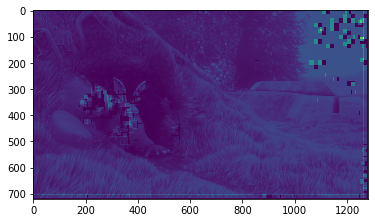

In [6]:
plt.imshow(predicted_image)

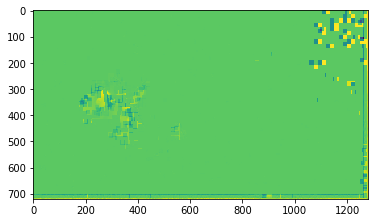

In [7]:
plt.imshow(residual)

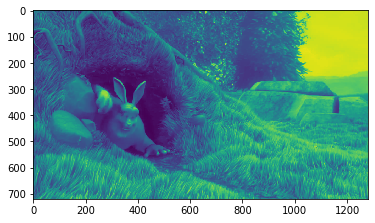

In [8]:
plt.imshow(residual + predicted_image)

In [0]:
import numpy as np
import cv2 
import math

# Function to extract frames 
def FrameCapture(path): 
      
    # Path to video file 
    vidObj = cv2.VideoCapture(path)
  
    # Used as counter variable 

    frames = []
    for i in range(2):
      success, image = vidObj.read() 
      frames.append(image)
    

    return frames

  
if __name__ == '__main__': 
  
    # Calling the function 
  frames =  FrameCapture("/content/drive/My Drive/H.264 implementation/bunny.mp4") 

  block_size_1 = 16
  block_size_2 = 16

####################################################################################
# convert the frames into grayscale


  # for i in range(len(frames)):
  #   r, g, b = frames[i][:,:,0], frames[i][:,:,1], frames[i][:,:,2]
  #   gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  #   rows, cols = gray.shape

  #   rows = rows//block_size_1
  #   cols = cols//block_size_2

  #   frames[i] = gray[0:rows*block_size_1, 0:cols*block_size_2]
  
  # # print(frames[0].shape)






  def get_motion_and_residual(frames, reference_seperation):
    
    
    block_size_1 = 16
    block_size_2 = 16

    rows, cols = frames[0].shape

    rows = rows//block_size_1
    cols = cols//block_size_2


    motion_vectors = []
    residuals = []
    

  ####################################################################################
    motion = []
    predicted = []
    

    for i in range(len(frames)):

      if(i%reference_seperation == 0):
        reference_frame = frames[i]
        motion.append([[0,0]]*rows*cols)
        residuals.append(np.zeros(frames[i].shape))
        predicted.append(frames[i])
        continue
      
      predicted_image = np.zeros((rows* block_size_1, cols * block_size_2))
      for row in range(rows):  # 720 * 1280                # 35 (rows) * 40 (cols) 
        for col in range(cols):
        
                
          search_range_x = range(row*block_size_1 - block_size_1, (row+1)*block_size_1 + block_size_1)
          search_range_y = range(col*block_size_2 - block_size_2, (col +1)*block_size_2 + block_size_2)

          if (row*block_size_1 - block_size_1 < 0):
            search_range_x = range(0, (row+1)*block_size_1 + block_size_1 )
          
          elif(row*block_size_1 + block_size_1 + block_size_1 - 1 >= (rows - 1) * block_size_1):
            search_range_x = range(row*block_size_1 - block_size_1 , (rows - 1)*block_size_1  -1 )



          if (col*block_size_2 - block_size_2 < 0):
            search_range_y = range(0, (col+1)*block_size_2 + block_size_2)
          
          elif(col*block_size_2 + block_size_2 + block_size_2 - 1 >= (cols -1) * block_size_2):
            search_range_y = range(col*block_size_2 - block_size_2 , (cols -1)  * block_size_2  - 1)

          min_diff = math.inf

          for shift_x in search_range_x:
            for shift_y in search_range_y:
              block_temp = frames[i][shift_x:shift_x+block_size_1, shift_y:shift_y+block_size_2]
              block = reference_frame[row* block_size_1:(row+1) * block_size_1, col*block_size_2:(col+1)*block_size_2]

              diff = np.sum(np.square(block_temp - block))

              if(diff < min_diff):
                min_diff = diff
                x_min = shift_x - row*block_size_1
                y_min = shift_y - col*block_size_2
          
          motion_vectors.append([x_min, y_min])
      
      motion.append(motion_vectors)
      counter = 0
      for r in range(rows):
          for c in range(cols):
          # print( motion_vectors[counter])
          # print(predicted_image[r*block_size_1+ motion_vectors[counter][0]:(r+1)*block_size_1+ motion_vectors[counter][0],
                          # c*block_size_2+ motion_vectors[counter][1]:(c+1)*block_size_2+motion_vectors[counter][1]
                          # ].shape)

          # print(frames[i][r* block_size_1:(r+1) * block_size_1, c*block_size_2:(c+1)*block_size_2].shape)
            predicted_image[r*block_size_1+ motion[-1][counter][0]:(r+1)*block_size_1+ motion[-1][counter][0],
                            c*block_size_2+ motion[-1][counter][1]:(c+1)*block_size_2+motion[-1][counter][1]
                            ] += reference_frame[r* block_size_1:(r+1) * block_size_1, c*block_size_2:(c+1)*block_size_2]
            counter = counter + 1
      
      predicted.append(predicted_image)
            

      residual = frames[i][:rows* block_size_1, :cols * block_size_2] - predicted_image      
      residuals.append(residual)      

    return motion, residuals, predicted


In [0]:
# Function to extract frames 
def FrameCapture_2(path): 
      
    # Path to video file 
    vidObj = cv2.VideoCapture(path)
  
    # Used as counter variable 

    frames = []
    for i in range(3):
      success, image = vidObj.read() 
      frames.append(image)
    

    return frames

In [0]:
frames = FrameCapture_2("/content/drive/My Drive/H.264 implementation/bunny.mp4")

In [165]:
print(frames[0].shape)
YCbCr_1=  cv2.cvtColor(frames[0][0:720,:,:], cv2.COLOR_RGB2YUV_I420)
YCbCr_2 = cv2.cvtColor(frames[1], cv2.COLOR_RGB2YUV_I420)
YCbCr_3 = cv2.cvtColor(frames[2], cv2.COLOR_RGB2YUV_I420)

frames = []
frames.append(YCbCr_1[:720,:])
frames.append(YCbCr_2[:720,:])
frames.append(YCbCr_3[:720,:])


(720, 1280, 3)


In [0]:
x,y,z = get_motion_and_residual(frames,5)

In [167]:
len(x)

3

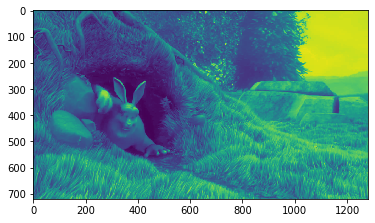

In [170]:
plt.imshow(y[1] +z[1] )

In [0]:
def chroma_residual(motion, chroma, reference_chroma):
  block_size_1 = 16//4
  block_size_2 = 16//2
  rows, cols = chroma.shape
  rows = rows//block_size_1
  cols = cols//block_size_2

  predicted_chroma = np.zeros(chroma.shape)
  counter = 0
  for r in range(rows):
        for c in range(cols):
          predicted_chroma[r*block_size_1+ motion[counter][0]//4:(r+1)*block_size_1+ motion[counter][0]//4,
                          c*block_size_2+ motion[counter][1]//2:(c+1)*block_size_2+motion[counter][1]//2
                          ] += reference_chroma[r* block_size_1:(r+1) * block_size_1, c*block_size_2:(c+1)*block_size_2]
          counter = counter + 1
  residual  = reference_chroma - predicted_chroma
      
  return residual, predicted_chroma


In [0]:
frames = FrameCapture_2("/content/drive/My Drive/H.264 implementation/bunny.mp4")
YCbCr_1=  cv2.cvtColor(frames[0], cv2.COLOR_RGB2YUV_I420)
YCbCr_2 = cv2.cvtColor(frames[1], cv2.COLOR_RGB2YUV_I420)
YCbCr_3 = cv2.cvtColor(frames[2], cv2.COLOR_RGB2YUV_I420)

frames = []
frames.append(YCbCr_1)
frames.append(YCbCr_2)
frames.append(YCbCr_3)


In [0]:
r,p = chroma_residual(x[2], frames[2][720:900,0:640],frames[0][720:900,0:640])

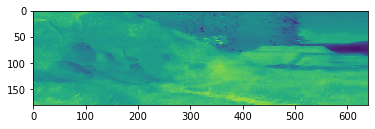

In [197]:
plt.imshow(r+ p)